In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score 

In [3]:
df=pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0.5, 0, 'class')

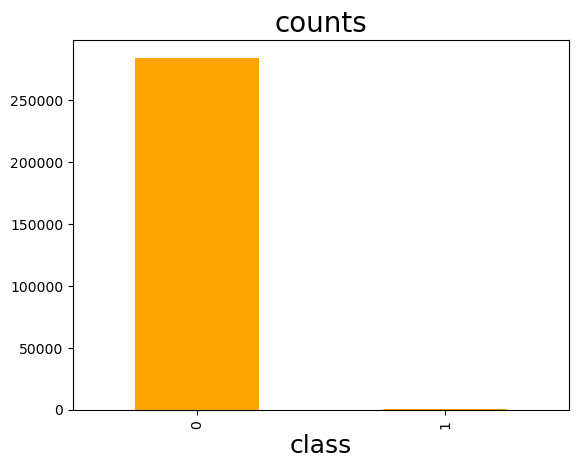

In [7]:
df["Class"].value_counts().plot(kind="bar",color="Orange")
plt.title("counts", size=20)
plt.xlabel("class", size = 18)

In [8]:
target = pd.DataFrame(df["Class"].value_counts())
target.style.background_gradient(cmap="Reds")

,Class
0,284315
1,492


In [9]:
#Compare the difference in time dimension between the number of abnormal transactions and the number of normal transactions.

print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Time[df.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


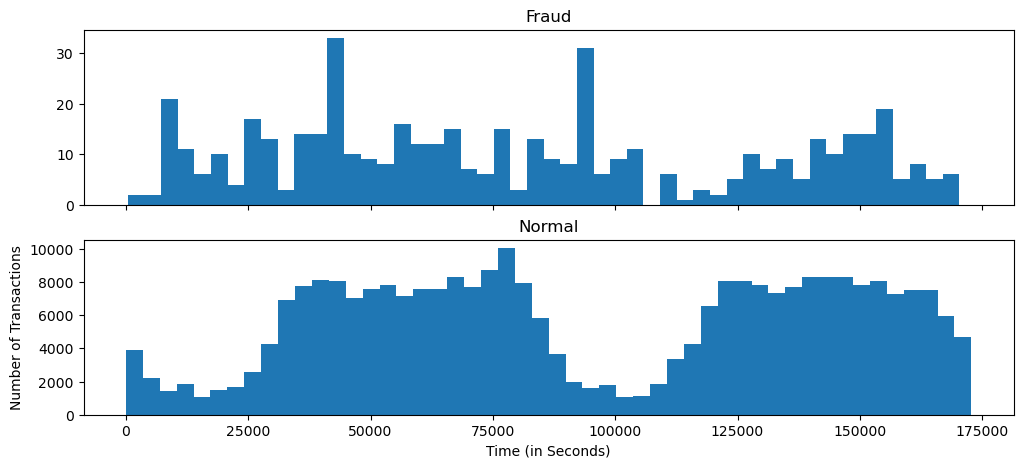

In [10]:
#It can be seen from the histogram that the number of normal transactions shows a certain periodicity in time

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,5))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [11]:
#Compare the difference between abnormal transactions and normal transaction amounts
print ("Fraud")
print (df.Amount[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Amount[df.Class == 0].describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


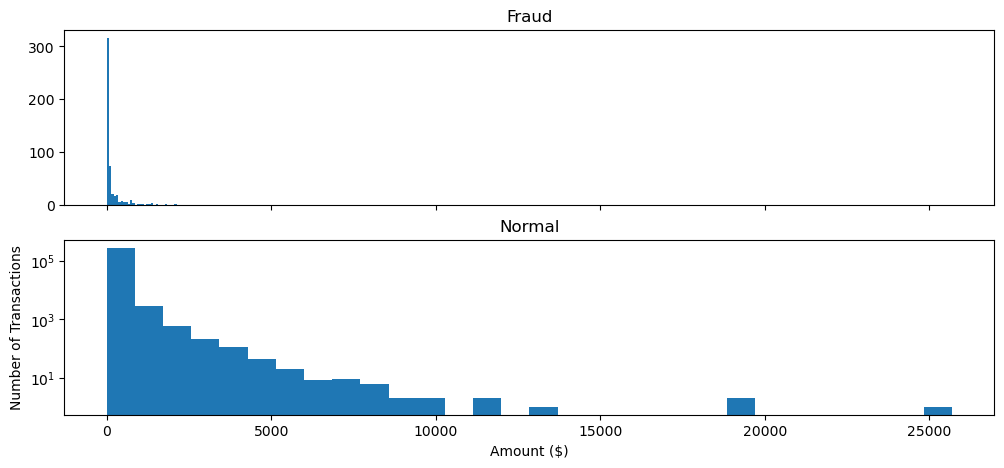

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,5))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

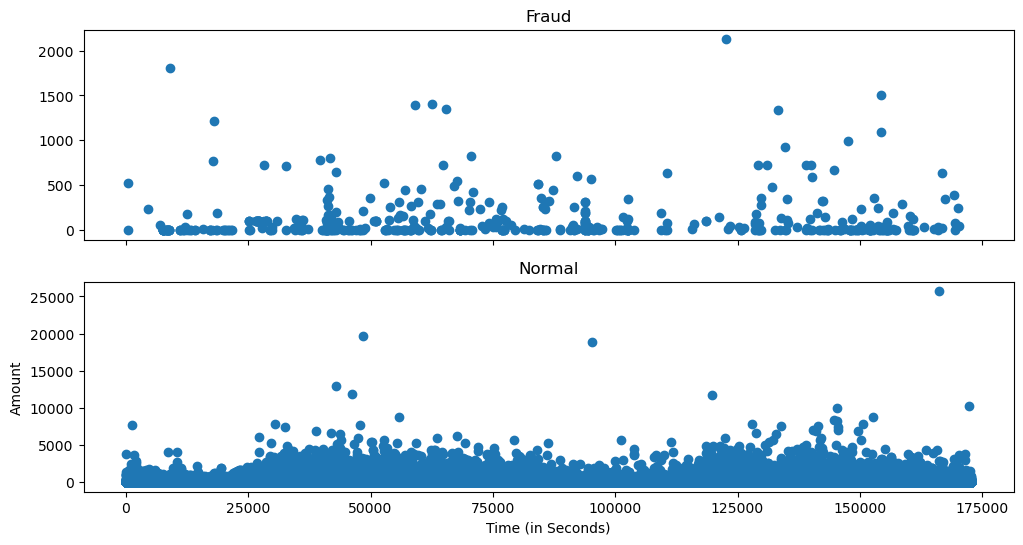

In [13]:
#relationship between transaction time and amount.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1632\336091666.py:16: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t0[f], bw=0.5,label="Class = 0")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1632\336091666.py:17: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t1[f], bw=0.5,label="Class = 1")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1632\336091666.py:16: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t

<Figure size 640x480 with 0 Axes>

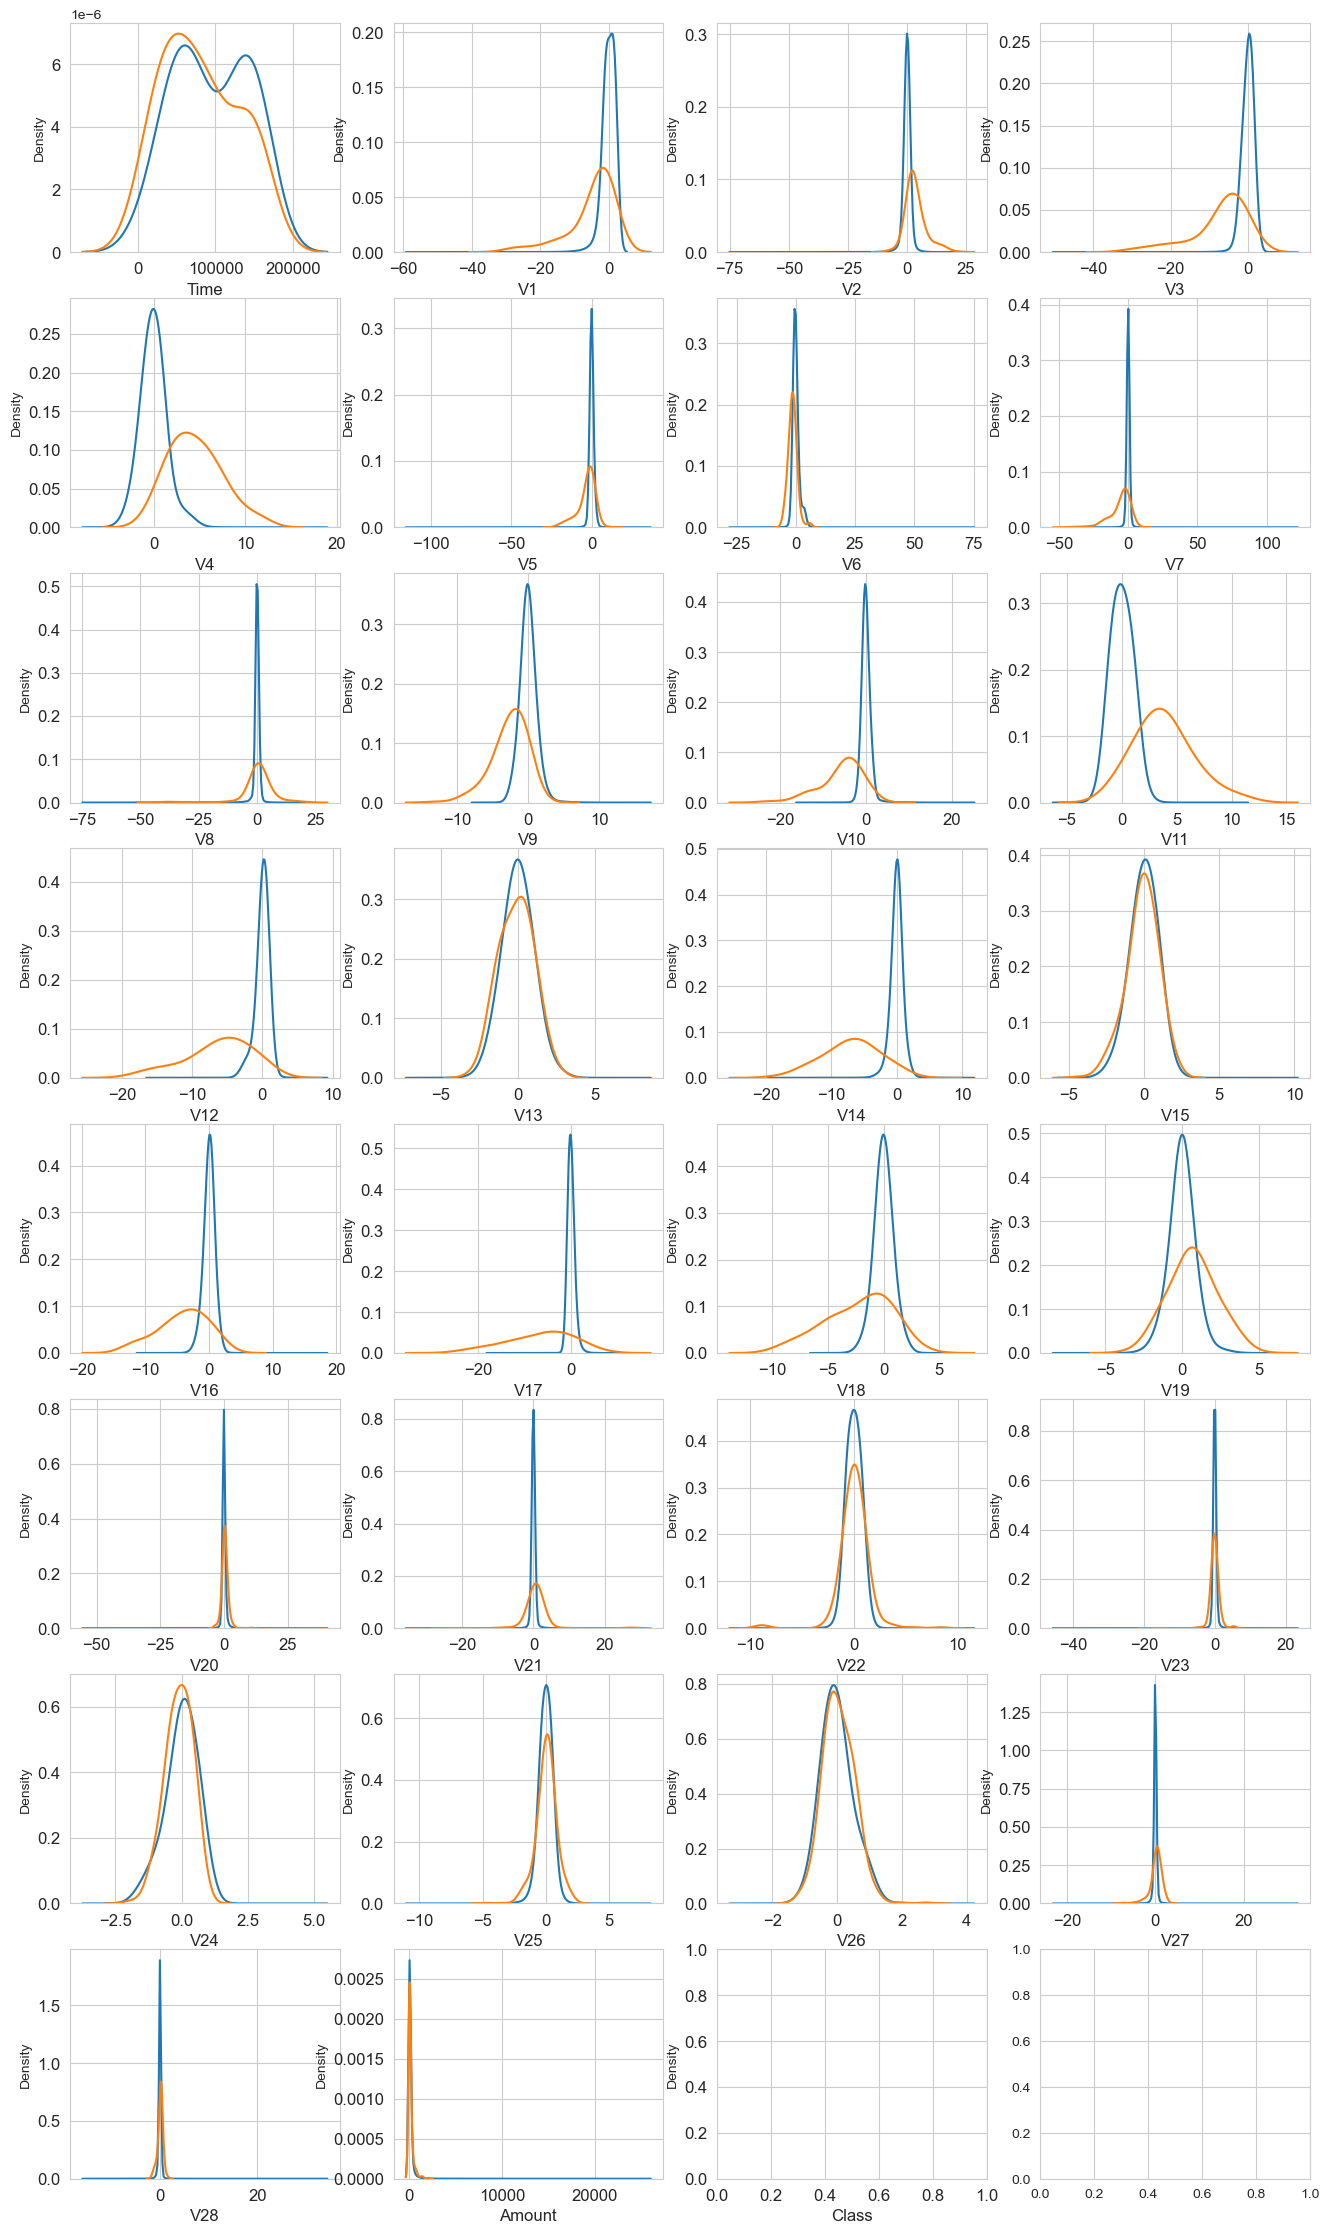

In [14]:
#distribution of normal and abnormal transactions for each feature separately.

features = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for f in features:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[f], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[f], bw=0.5,label="Class = 1")
    plt.xlabel(f, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

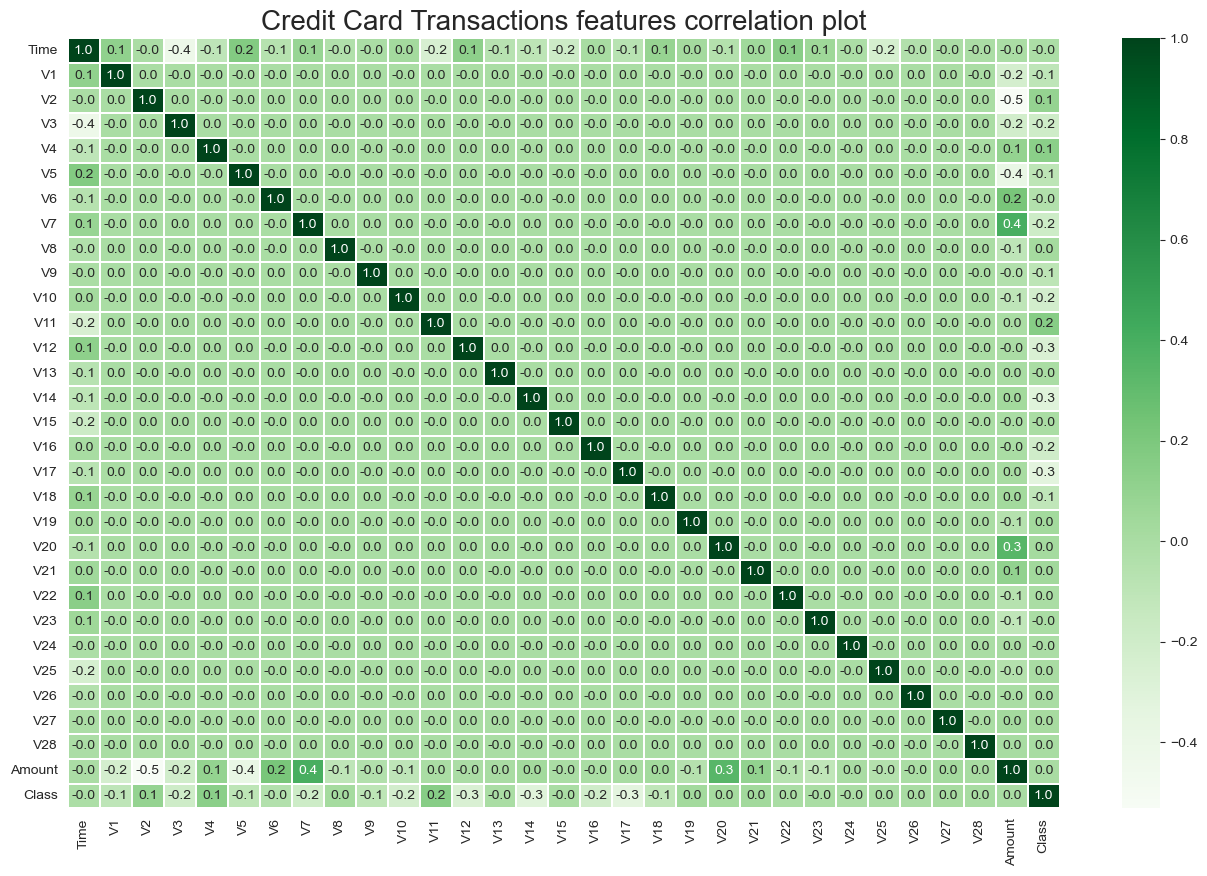

In [15]:
#Correlation between the features
plt.figure(figsize = (16,10))
plt.title('Credit Card Transactions features correlation plot', size = 20)
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens",fmt='.1f',annot=True)
plt.show()

In [16]:
#Data Preparation
x=df.drop(columns=["Class"])
y=df["Class"]

In [17]:
names=x.columns
scaled_df = preprocessing.scale(x)
scaled_df = pd.DataFrame(scaled_df,columns=names)

In [18]:
scaled_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [19]:
#Seperate the data set for train and test
x_train, x_test, y_train, y_test = train_test_split(scaled_df, y, test_size = 0.2, random_state = 66, shuffle = True, stratify = y)

In [20]:
x_train.shape, x_test.shape

((227845, 30), (56962, 30))

In [21]:
y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [22]:
# Create an instance of the SMOTE class
sm = SMOTE(random_state=33)

# Use fit_resample instead of fit_sample
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train.ravel())

<Axes: >

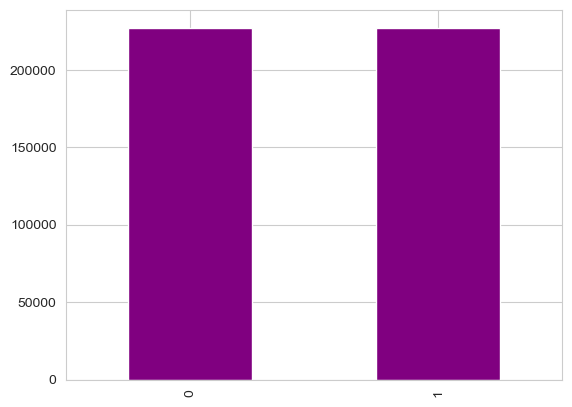

In [23]:
pd.Series(y_train_smote).value_counts().plot(kind="bar", color="purple")

In [24]:
#Create Logistic Regression
#Train a logistic regression model with pre-balanced data
# logistic regression, x_train, y_trian
lrm = LogisticRegression(solver='lbfgs')
lrm.fit(x_train, y_train)
lrm_y = lrm.predict(x_test)

In [25]:
print('Accuracy score for Testing Dataset = ', accuracy_score(lrm_y, y_test))

Accuracy score for Testing Dataset =  0.9992275552122467


Text(0.5, 1.0, 'LR Confusion Matrix')

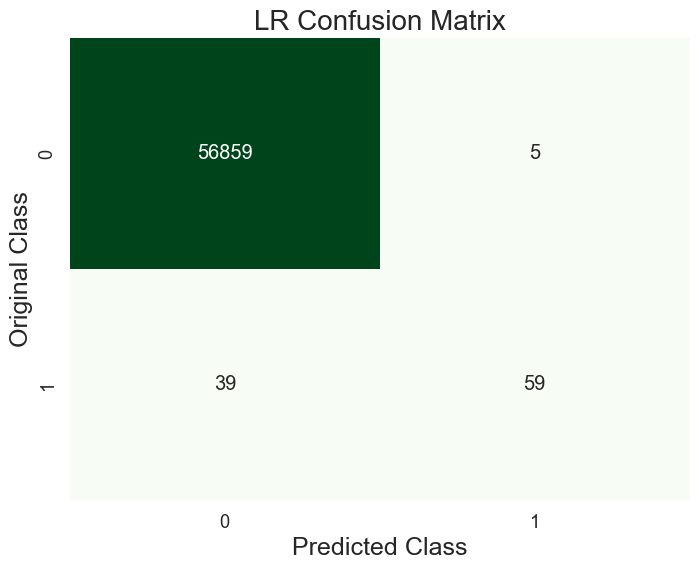

In [26]:
# confusion matrix
cm=confusion_matrix(y_test, lrm_y)
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt = 'g', cmap="Greens", cbar = False)
plt.xlabel("Predicted Class", size = 18)
plt.ylabel("Original Class", size = 18)
plt.title("LR Confusion Matrix", size = 20)

In [27]:
#Recall, Precision, Accuracy, and F1 score of the logistic regression model.
print(classification_report(y_test, lrm_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.60      0.73        98

    accuracy                           1.00     56962
   macro avg       0.96      0.80      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [28]:
#Use smote-balanced data to train a logistic regression model
# logistic regression, x_train_smote, y_trian_smote
lrm_smote = LogisticRegression(solver='lbfgs')
lrm_smote.fit(x_train_smote, y_train_smote)
lrm_smote_y = lrm_smote.predict(x_test)

In [29]:
print('Accuracy score for Testing Dataset = ', accuracy_score(lrm_smote_y, y_test))

Accuracy score for Testing Dataset =  0.9760717671430076


Text(0.5, 1.0, 'LR Confusion Matrix')

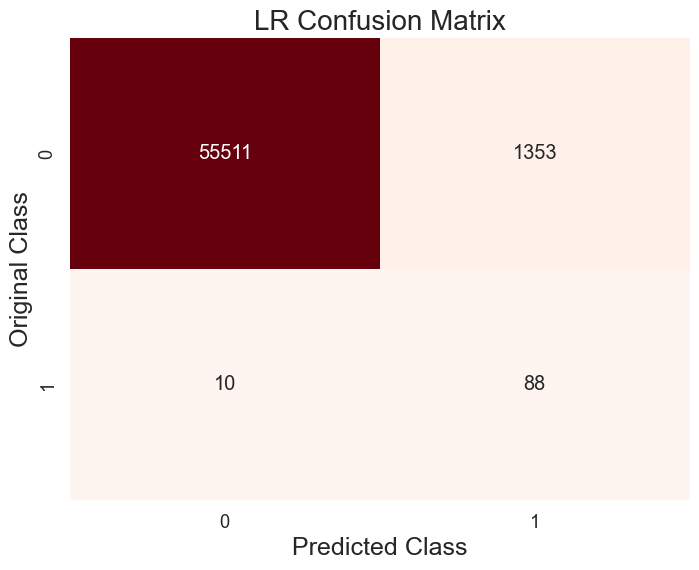

In [30]:
# confusion matrix
cm=confusion_matrix(y_test, lrm_smote_y)

plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt = 'g', cmap="Reds", cbar = False)
plt.xlabel("Predicted Class", size = 18)
plt.ylabel("Original Class", size = 18)
plt.title("LR Confusion Matrix", size = 20)

In [31]:
print(classification_report(y_test, lrm_smote_y))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.90      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [32]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [33]:
#Training a decision tree model using pre-balanced data
# Decision Tree, x_tain, y_train
dtm = DecisionTreeClassifier()
dtm.fit(x_train_smote, y_train_smote)
 
# Predict on testing set
dtm_y = dtm.predict(x_test)

In [34]:
print('Accuracy score for Testing Dataset = ', accuracy_score(dtm_y, y_test))

Accuracy score for Testing Dataset =  0.9975948878199501


Text(0.5, 1.0, 'LR Confusion Matrix')

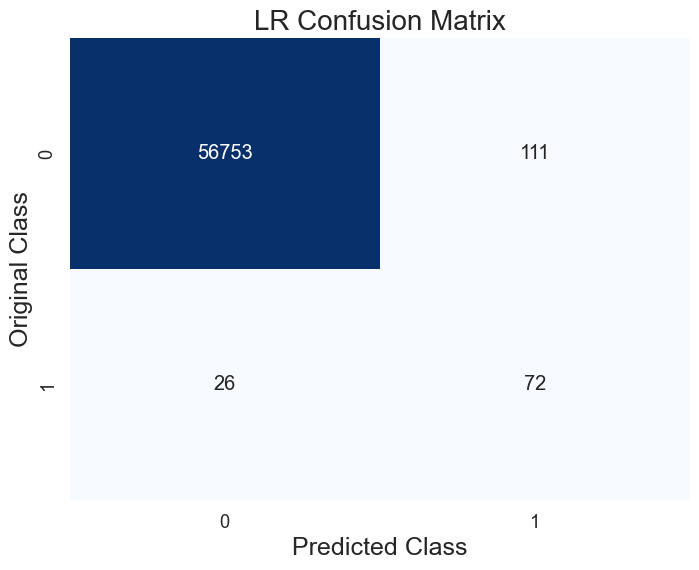

In [35]:
cm=confusion_matrix(y_test, dtm_y)

plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt = 'g', cmap="Blues", cbar = False)
plt.xlabel("Predicted Class", size = 18)
plt.ylabel("Original Class", size = 18)
plt.title("LR Confusion Matrix", size = 20)

In [36]:
print(classification_report(y_test, dtm_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.73      0.51        98

    accuracy                           1.00     56962
   macro avg       0.70      0.87      0.76     56962
weighted avg       1.00      1.00      1.00     56962



In [37]:
#Use smote-balanced data to train a decision tree model
# Decision Tree, x_train_smote, y_train_smote
dtm_smote = DecisionTreeClassifier()
dtm_smote.fit(x_train_smote, y_train_smote)

# Predict on testing set
dtm_smote_y = dtm_smote.predict(x_test)

In [38]:
print('Accuracy score for Testing Dataset = ', accuracy_score(dtm_smote_y, y_test))

Accuracy score for Testing Dataset =  0.9976299989466662


Text(0.5, 1.0, 'LR Confusion Matrix')

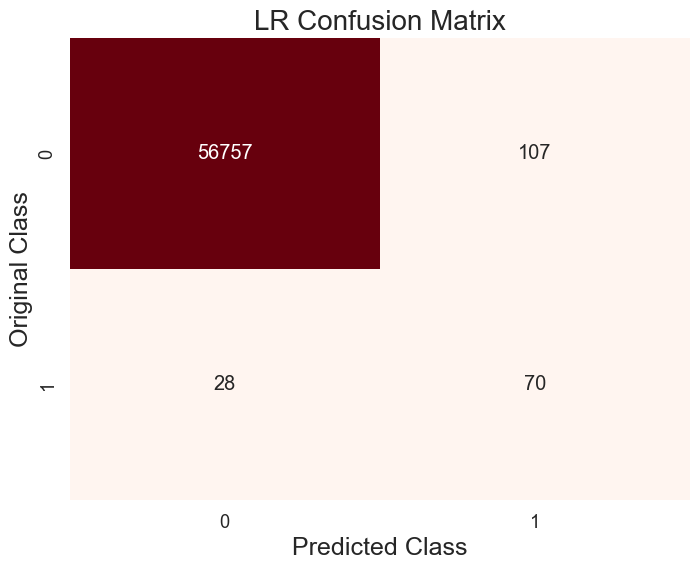

In [39]:
cm=confusion_matrix(y_test, dtm_smote_y)

plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt = 'g', cmap="Reds", cbar = False)
plt.xlabel("Predicted Class", size = 18)
plt.ylabel("Original Class", size = 18)
plt.title("LR Confusion Matrix", size = 20)

In [40]:
print(classification_report(y_test, dtm_smote_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.40      0.71      0.51        98

    accuracy                           1.00     56962
   macro avg       0.70      0.86      0.75     56962
weighted avg       1.00      1.00      1.00     56962



In [72]:
#RANDOM FOREST
# Random forest tree algorithm
from sklearn.ensemble import RandomForestClassifier

In [73]:
# Random Forest, x_tain, y_train
parameters_rf = {'n_estimators':15,'class_weight': "balanced",'n_jobs':-1,'random_state':42}
rfm = RandomForestClassifier(**parameters_rf)
rfm.fit(x_train, y_train)
 
# Predict on testing set
rfm_y = rfm.predict(x_test)

In [74]:
print('Accuracy score for Testing Dataset = ', accuracy_score(rfm_y, y_test))

Accuracy score for Testing Dataset =  0.9994557775359011


Text(0.5, 1.0, 'LR Confusion Matrix')

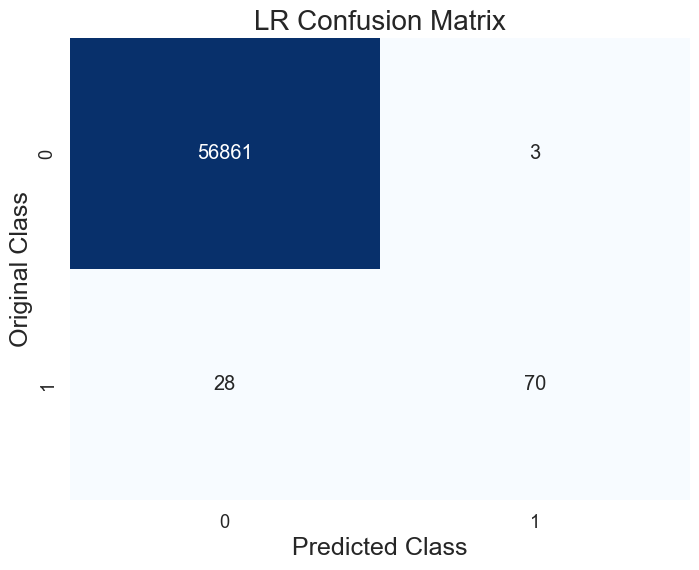

In [75]:
cm=confusion_matrix(y_test, rfm_y)

plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt = 'g', cmap="Blues", cbar = False)
plt.xlabel("Predicted Class", size = 18)
plt.ylabel("Original Class", size = 18)
plt.title("LR Confusion Matrix", size = 20)

In [76]:
print(classification_report(y_test, rfm_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.71      0.82        98

    accuracy                           1.00     56962
   macro avg       0.98      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [77]:
#Use smote-balanced data to train a random forest model
# Random Forest, x_tain_smote, y_train_smote
parameters_rf = {'n_estimators':15,'class_weight': "balanced",'n_jobs':-1,'random_state':42}
rfm_smote = RandomForestClassifier(**parameters_rf)
rfm_smote.fit(x_train_smote, y_train_smote)
 
# Predict on testing set
rfm_smote_y = rfm_smote.predict(x_test)

In [78]:
print('Accuracy score for Testing Dataset = ', accuracy_score(rfm_smote_y, y_test))

Accuracy score for Testing Dataset =  0.9994382219725431


Text(0.5, 1.0, 'LR Confusion Matrix')

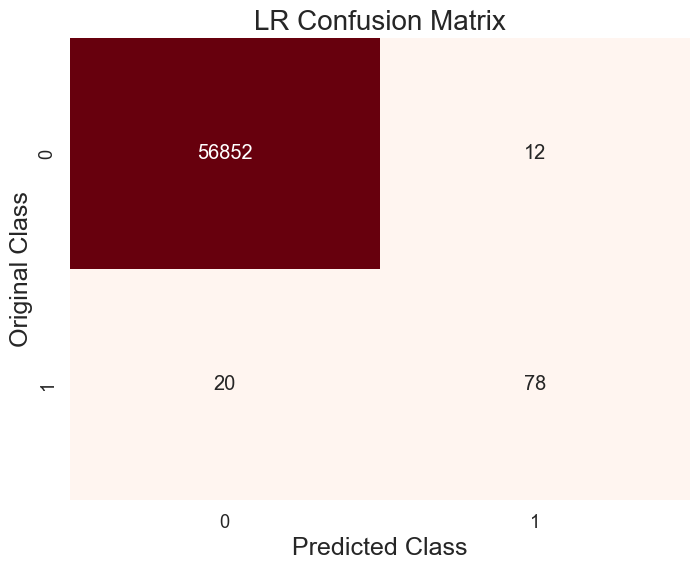

In [79]:
cm=confusion_matrix(y_test, rfm_smote_y)

plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt = 'g', cmap="Reds", cbar = False)
plt.xlabel("Predicted Class", size = 18)
plt.ylabel("Original Class", size = 18)
plt.title("LR Confusion Matrix", size = 20)

In [80]:
print(classification_report(y_test, rfm_smote_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.80      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [81]:
#XG BOOST
from xgboost import XGBClassifier

In [82]:
#Train XGBoost model with pre-balanced data
# XGBoost, x_train, y_train
parameters_xgbm = {'max_depth':3,'class_weight': "balanced",'n_jobs':-1,'random_state':42,'learning_rate':0.1}
xgbm = XGBClassifier(**parameters_xgbm)
xgbm.fit(x_train, y_train)
 
# Predict on testing set
xgbm_y = xgbm.predict(x_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [19:59:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


In [83]:
print('Accuracy score for Testing Dataset = ', accuracy_score(xgbm_y, y_test))

Accuracy score for Testing Dataset =  0.9995786664794073


Text(0.5, 1.0, 'LR Confusion Matrix')

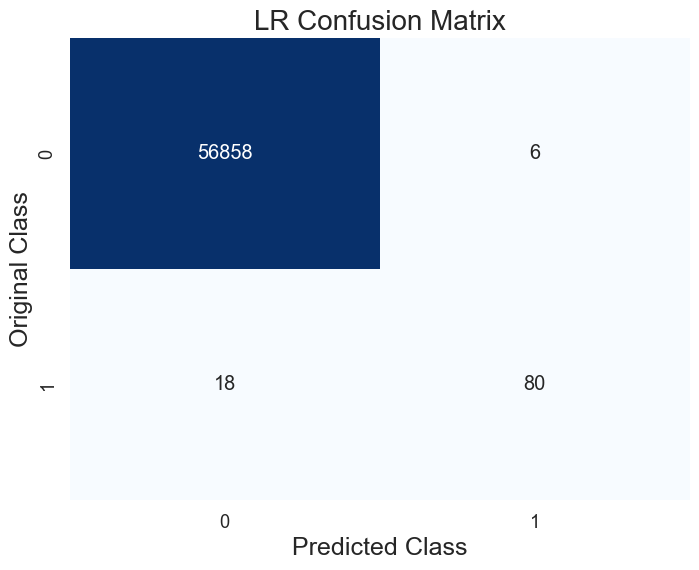

In [84]:
cm=confusion_matrix(y_test, xgbm_y)

plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt = 'g', cmap="Blues", cbar = False)
plt.xlabel("Predicted Class", size = 18)
plt.ylabel("Original Class", size = 18)
plt.title("LR Confusion Matrix", size = 20)

In [85]:
print(classification_report(y_test, xgbm_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [86]:
#Use smote balanced data to train the XGBoost model
# XGBoost, x_train_smote, y_train_smote
parameters_xgbm = {'max_depth':3,'class_weight': "balanced",'n_jobs':-1,'random_state':42,'learning_rate':0.1}
xgbm_smote = XGBClassifier(**parameters_xgbm)
xgbm_smote.fit(x_train_smote, y_train_smote)
 
# Predict on testing set
xgbm_smote_y = xgbm_smote.predict(x_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [19:59:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


In [87]:
print('Accuracy score for Testing Dataset = ', accuracy_score(xgbm_smote_y, y_test))

Accuracy score for Testing Dataset =  0.9897299954355535


Text(0.5, 1.0, 'LR Confusion Matrix')

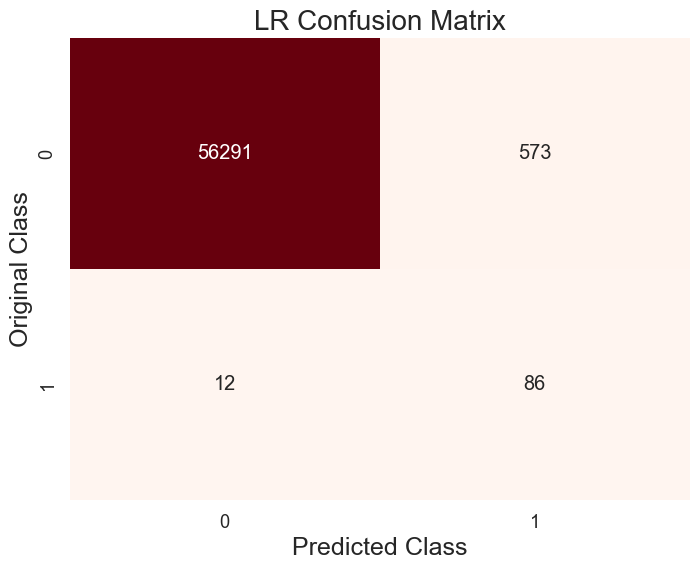

In [88]:
cm=confusion_matrix(y_test, xgbm_smote_y)

plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt = 'g', cmap="Reds", cbar = False)
plt.xlabel("Predicted Class", size = 18)
plt.ylabel("Original Class", size = 18)
plt.title("LR Confusion Matrix", size = 20)

In [89]:
print(classification_report(y_test, xgbm_smote_y))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.88      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.93      0.61     56962
weighted avg       1.00      0.99      0.99     56962



In [90]:
#NEURAL NETWORK
#Neural network structure construction The structure contains two hidden layers, each with 36 neurons, and uses batch normalization and dropout to avoid overfitting. Select the relu activation function for the input and hidden layers, and use the sigmoid activation function for the output layer.

In [91]:
model = Sequential()
model.add(Dense(x_train_smote.shape[1], activation = 'relu', input_dim = x_train_smote.shape[1]))
model.add(BatchNormalization())

model.add(Dense(36, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(36, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

In [92]:
model.compile(optimizer = keras.optimizers.Adam(lr=0.0001),
              loss = 'binary_crossentropy')

In [93]:
#avoid overfitting, use the EarlyStopping function to stop the training process when the metric is not further optimized.

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 10)

In [94]:
model.fit(x=x_train_smote, y=y_train_smote, batch_size = 256, epochs=150,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop])

model.summary()

Epoch 1/150
1777/1777 [==============================] - 13s 5ms/step - loss: 0.0961 - val_loss: 0.0370
Epoch 2/150
1777/1777 [==============================] - 9s 5ms/step - loss: 0.0229 - val_loss: 0.0180
Epoch 3/150
1777/1777 [==============================] - 9s 5ms/step - loss: 0.0148 - val_loss: 0.0163
Epoch 4/150
1777/1777 [==============================] - 9s 5ms/step - loss: 0.0117 - val_loss: 0.0125
Epoch 5/150
1777/1777 [==============================] - 9s 5ms/step - loss: 0.0097 - val_loss: 0.0128
Epoch 6/150
1777/1777 [==============================] - 9s 5ms/step - loss: 0.0085 - val_loss: 0.0109
Epoch 7/150
1777/1777 [==============================] - 9s 5ms/step - loss: 0.0072 - val_loss: 0.0130
Epoch 8/150
1777/1777 [==============================] - 9s 5ms/step - loss: 0.0067 - val_loss: 0.0078
Epoch 9/150
1777/1777 [==============================] - 9s 5ms/step - loss: 0.0062 - val_loss: 0.0102
Epoch 10/150
1777/1777 [==============================] - 9s 5ms/step - 

Text(0.5, 1.0, 'Loss for Training and Validation')

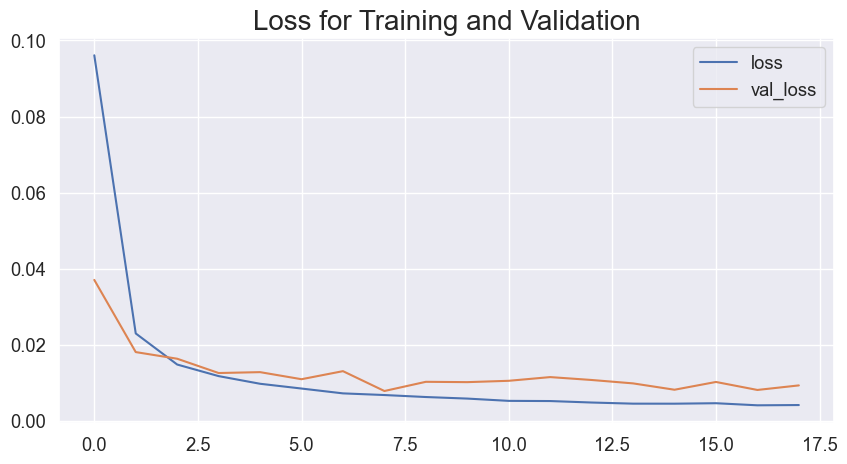

In [96]:
evaluation_metrics=pd.DataFrame(model.history.history)
evaluation_metrics.plot(figsize=(10,5))
plt.title("Loss for Training and Validation", size = 20)

In [106]:

# Assuming model is your Sequential model
y_pred_probabilities = model.predict(x_test)
y_predict = y_pred_probabilities.argmax(axis=-1)

1781/1781 [==============================] - 5s 3ms/step


In [107]:
nn_cm = confusion_matrix(y_test, y_predict)
nn_cm

array([[56864,     0],
       [   98,     0]], dtype=int64)

Text(0.5, 1.0, 'NN Confusion Matrix')

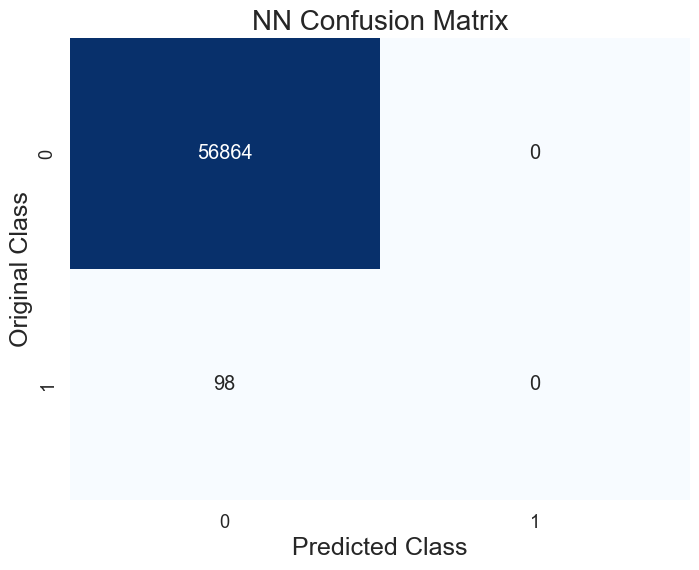

In [108]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(nn_cm, annot=True, fmt = 'g', cmap="Blues", cbar = False)
plt.xlabel("Predicted Class", size = 18)
plt.ylabel("Original Class", size = 18)
plt.title("NN Confusion Matrix", size = 20)

Text(0.5, 1.0, 'NN Confusion Matrix')

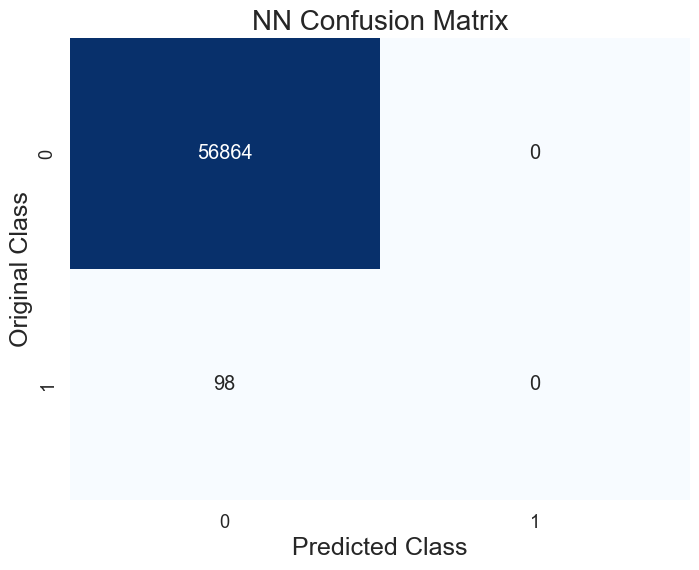

In [109]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(nn_cm, annot=True, fmt = 'g', cmap="Blues", cbar = False)
plt.xlabel("Predicted Class", size = 18)
plt.ylabel("Original Class", size = 18)
plt.title("NN Confusion Matrix", size = 20)

In [110]:
#Recall, Precision, Accuracy, and F1 score of the neural network model.
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
#	The accuracy of the model on the test data is > 75%

In [ ]:
#As you can see with our Random Forest Model we are getting a better result even for the recall which is the most tricky part.